# Example of using nc_particles code to read a nc_particles file.

In [1]:
# get set up
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

import nc_particles

In [2]:
# open the file:
r = nc_particles.Reader('boston_trajectory.nc')

In [3]:
# see what's in there:
print r.variables

[u'spill_num', u'longitude', u'age', u'depth', u'mass', u'latitude', u'status_codes', u'id']


In [4]:
# what are the attributes of some of those variables?
print r.get_attributes('depth')
print r.get_attributes('status_codes')

{u'units': u'meters', u'long_name': u'particle depth below sea surface', u'standard_name': u'depth', u'axis': u'z positive down'}
{u'flag_meanings': u'0: not_released, 2: in_water, 3: on_land, 7: off_maps, 10: evaporated, 12: to_be_removed,', u'long_name': u'particle status code', u'flag_values': u'7 12 0 10 2 3'}


In [5]:
# what times have we got?
print r.times
print"There are {} time steps".format(len(r.times))

[datetime.datetime(2013, 3, 12, 10, 0)
 datetime.datetime(2013, 3, 12, 10, 30)
 datetime.datetime(2013, 3, 12, 11, 0)
 datetime.datetime(2013, 3, 12, 11, 30)
 datetime.datetime(2013, 3, 12, 12, 0)
 datetime.datetime(2013, 3, 12, 12, 30)
 datetime.datetime(2013, 3, 12, 13, 0)
 datetime.datetime(2013, 3, 12, 13, 30)
 datetime.datetime(2013, 3, 12, 14, 0)
 datetime.datetime(2013, 3, 12, 14, 30)
 datetime.datetime(2013, 3, 12, 15, 0)
 datetime.datetime(2013, 3, 12, 15, 30)
 datetime.datetime(2013, 3, 12, 16, 0)
 datetime.datetime(2013, 3, 12, 16, 30)
 datetime.datetime(2013, 3, 12, 17, 0)
 datetime.datetime(2013, 3, 12, 17, 30)
 datetime.datetime(2013, 3, 12, 18, 0)
 datetime.datetime(2013, 3, 12, 18, 30)
 datetime.datetime(2013, 3, 12, 19, 0)
 datetime.datetime(2013, 3, 12, 19, 30)
 datetime.datetime(2013, 3, 12, 20, 0)
 datetime.datetime(2013, 3, 12, 20, 30)
 datetime.datetime(2013, 3, 12, 21, 0)
 datetime.datetime(2013, 3, 12, 21, 30)
 datetime.datetime(2013, 3, 12, 22, 0)]
There are 25

In [6]:
# get the positions of the particles at last time step

In [7]:
positions = r.get_timestep(24)

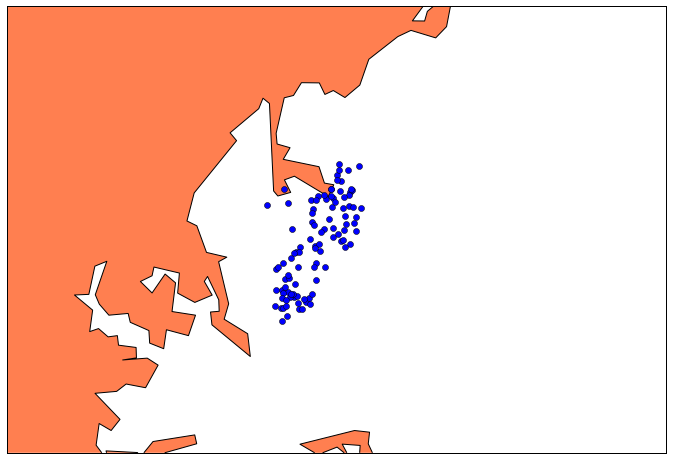

In [8]:
# plot them on a basemap
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='merc',
            llcrnrlat=42.3,
            urcrnrlat=42.5,
            llcrnrlon=-71.1,
            urcrnrlon=-70.7,
            lat_ts=42,
            resolution='h', #NoteL not good resolution, but 'f' takes way too long!
           )
_ = m.drawcoastlines()
_ = m.fillcontinents(color='coral',lake_color='aqua')
m.plot(positions['longitude'], positions['latitude'], 'o', latlon=True)


In [9]:
# plot the path of a particular particle
trajectory = r.get_individual_trajectory(15)


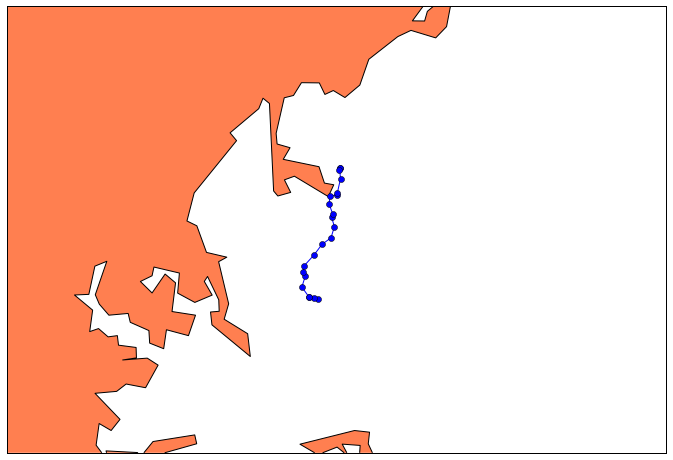

In [10]:
m = Basemap(projection='merc',
            llcrnrlat=42.3,
            urcrnrlat=42.5,
            llcrnrlon=-71.1,
            urcrnrlon=-70.7,
            lat_ts=42,
            resolution='h',# 'f' tales way too long!
           )
_ = m.drawcoastlines()
_ = m.fillcontinents(color='coral',lake_color='aqua')
m.plot(trajectory['longitude'], trajectory['latitude'], 'o-', latlon=True)